In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

# **Predict whether you will survive or not if you will be on Titanic**

# **Part 1 : Importing and loading Data**

In [ ]:
# The first and formost important thing is to import four important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading data / csv file as data frames with the help of panda

train = pd.read_csv('train.csv')

#**Part 2 : Plotting Data and Reading it's various componnets**

In [ ]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train.shape

(891, 12)

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here, By Using train.info() , we found out there are 12 Variables and 891 cases.
Some of them having missing data , some have string or char values. 

# **Step 3 : Exploratory Data Analysis | Sherlock Holmes Times**
Here , we normalize , clean , modify and analyze data

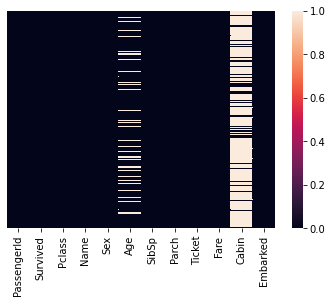

In [ ]:
# Check for null values using heatmap 
sns.heatmap(train.isnull(),yticklabels=False)

In [ ]:
# Or you can use use percentage to find null variables
train.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
# Selecting Values that only contain values not NA
train = train[train['Embarked'].notna()]

In [ ]:
train.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.910011
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.277840
Embarked        0.000000
dtype: float64

In [ ]:
# Print Unique values
print(train['Sex'].unique())
print(train['Embarked'].unique())
print(train['Age'].unique())

['male' 'female']
['S' 'C' 'Q']
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [ ]:
# In Sex & Embark , there is 2 and 3 categorical values are present , so we use Ninja Encoder from sklearn
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

# Encoding Sex Column
train.iloc[:, 4] = encode.fit_transform(train.iloc[:, 4].values)          #Here 5 is the index of the Sex Variable/Column  iloc is used for index of row and column

# Encoding Embarked column
train.iloc[:, -1] = encode.fit_transform(train.iloc[:, -1].values)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
# Print Unique values
print(train['Sex'].unique())
print(train['Embarked'].unique())
print(train['Age'])

[1 0]
[2 0 1]
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64


In [ ]:
# Cabinet has lot of null values mre than 50% it has to be dropped
train.drop('Cabin',axis=1,inplace=True)

#PassengerId , Name , Ticket Variables is not useful so we will also delete them
train.drop('PassengerId',axis=1,inplace=True)
train.drop('Name',axis=1,inplace=True)
train.drop('Ticket',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


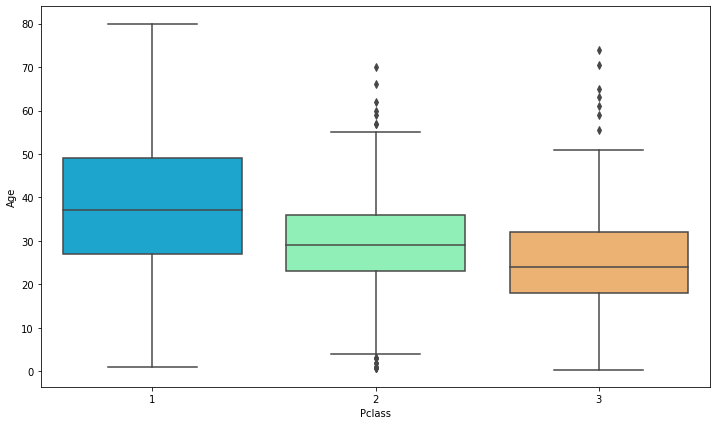

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age', data=train, palette = 'rainbow')

In [ ]:
# Here we found out average age of persons in Pclasses are different so we will change them accordingly
def impute_age(var):
    Age = var[0]
    Pclass = var[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1 )

In [ ]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,25.0,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0


In [ ]:
train['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

#**Part 4 : Visualizing Data using Seaborn to find Patterns and Answers to your Ambiguint Questions**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


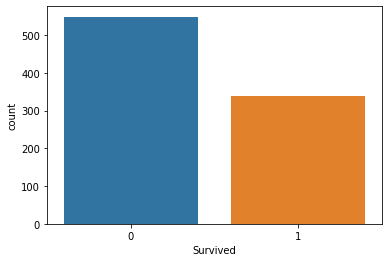

In [ ]:
sns.countplot(train['Survived'])          # How many survived

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 102.5 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

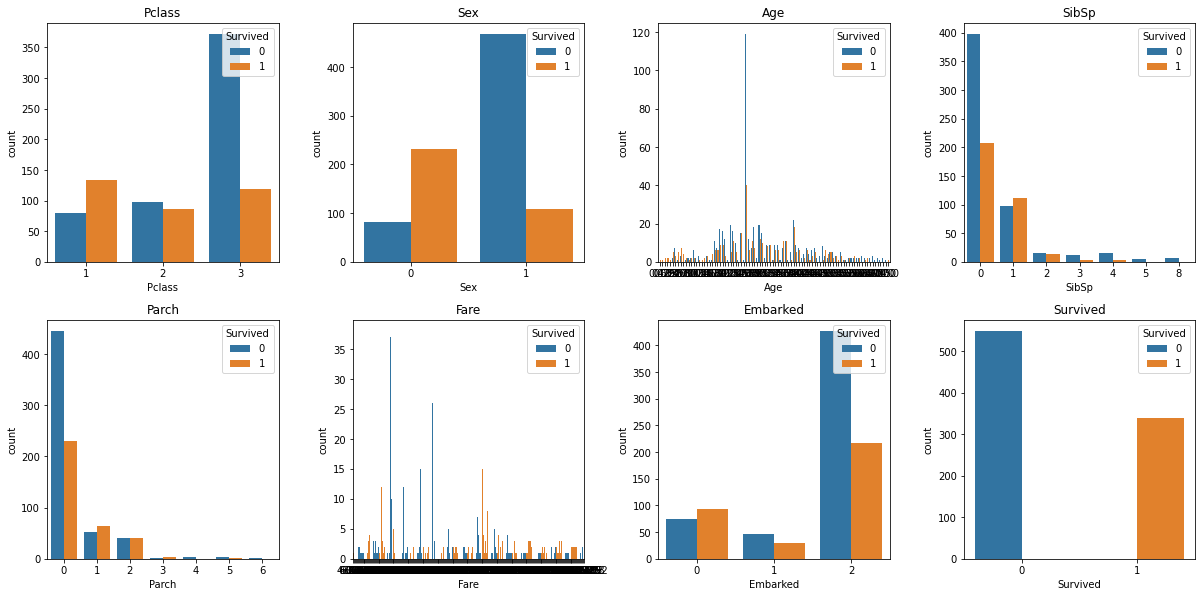

In [ ]:
# Visualize count of Survivors with 'Pclass' , 'Sex' , 'Age' , 'Sibsp' , 'Parch' , 'Fare' , 'Embarked'

var = ['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch' , 'Fare' , 'Embarked', 'Survived']

no_rows = 2
no_cols = 4

fig, axs = plt.subplots(no_rows, no_cols, figsize = (no_cols * 4.2,no_rows * 4.2) )

for r in range(0, no_rows):
  for c in range(0, no_cols):
    i = r*no_cols + c 
    ax = axs[r][c]
    sns.countplot(train[var[i]], hue=train['Survived'], ax=ax)
    ax.set_title(var[i])
    ax.legend(title='Survived', loc = 'upper right')

  plt.tight_layout()

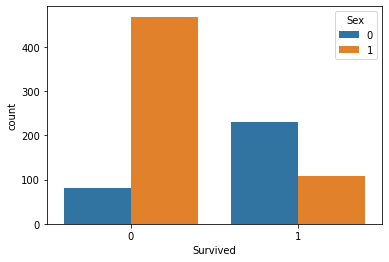

In [ ]:
sns.countplot(x='Survived',data=train,hue='Sex')          # Here 1 is encoded as Male and 0 is encoded as Female

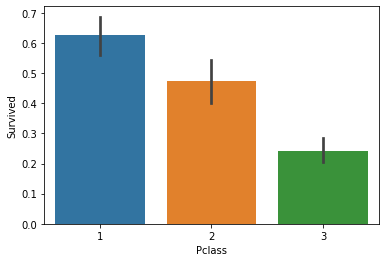

In [ ]:
sns.barplot(x='Pclass', y='Survived', data= train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


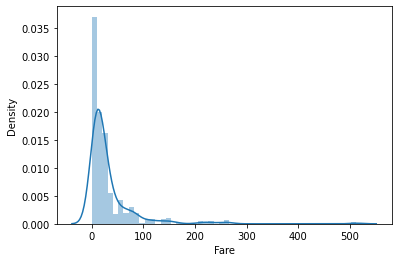

In [ ]:
sns.distplot(train['Fare'])

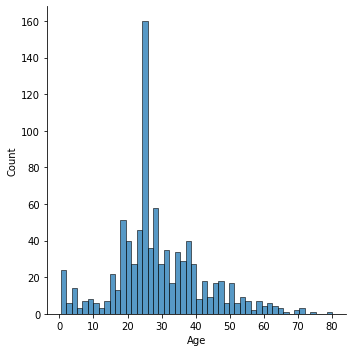

In [ ]:
sns.displot(train['Age'].dropna(),kde=False,bins=50)

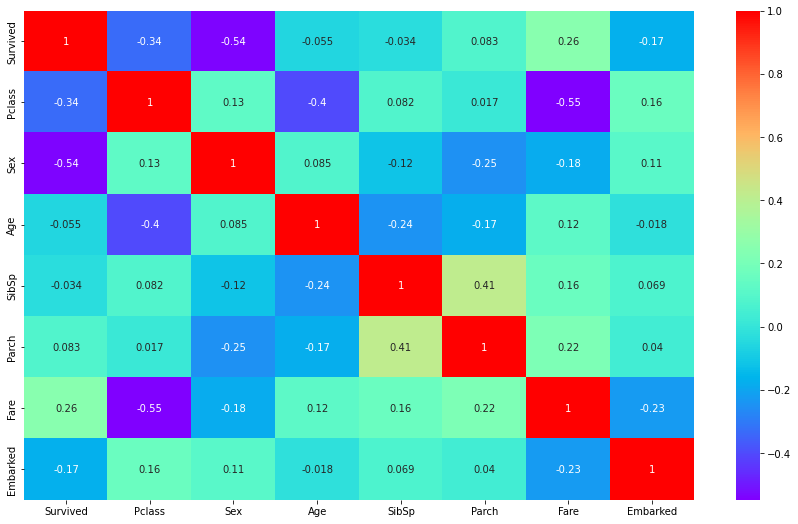

In [ ]:
# Correlation Matrix to find the correlation between attributes

cor_rel = train.corr()
plt.figure(figsize=(15,9))
sns.heatmap(cor_rel,annot=True,cmap="rainbow")

In [ ]:
train.groupby('Embarked')[['Survived']].mean()          #0 for c   1 for Q    2 for S 

,Survived
Embarked,
0,0.553571
1,0.389610
2,0.336957


In [ ]:
train.groupby('Sex')[['Survived']].mean()


,Survived
Sex,
0,0.740385
1,0.188908


In [ ]:
train.groupby('Parch')[['Survived']].mean()

,Survived
Parch,
0,0.341716
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [ ]:
train.groupby('SibSp')[['Survived']].mean()

,Survived
SibSp,
0,0.343234
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [ ]:
pd.pivot_table(train, index='Survived', values = 'Sex', columns='Pclass')

Pclass,1,2,3
Survived,,,
0,0.962500,0.938144,0.806452
1,0.335821,0.195402,0.394958


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 102.5 KB


In [ ]:
age = pd.cut(train['Age'],[0,18,45,60,80])
train.pivot_table('Survived',['Sex',age],'Pclass')

Pclass               1         2         3
Sex Age                                   
0   (0, 18]   0.909091  1.000000  0.511628
    (18, 45]  0.983871  0.909091  0.500000
    (45, 60]  0.944444  0.857143  0.000000
    (60, 80]  1.000000       NaN  1.000000
1   (0, 18]   0.800000  0.600000  0.215686
    (18, 45]  0.400000  0.090909  0.128114
    (45, 60]  0.333333  0.000000  0.000000
    (60, 80]  0.083333  0.333333  0.000000

#**Part 5 : Training and Prediction**

In [ ]:
# Split data into independent and dependent variables , here all are independent variables but Survival is dependent variable
X = train.iloc[:,1:8].values
Y = train.iloc[:,0].values

In [ ]:
# Split dataset into 80% Training and 20% Testing
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size=0.2, random_state=0)

In [ ]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
# Creating Machine Learning Models

def mlmodels(X_train,Y_train):
  
  # Using Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)

  # Using KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5 ,  metric = 'minkowski', p=2)
  knn.fit(X_train, Y_train)

  #USing Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  # Using Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #Printing accuracy
  print('Log_Reg Accuracy : ',log.score(X_train,Y_train))
  print("KNN Accuracy : ",knn.score(X_train,Y_train))
  print("Dec_Tree Accuracy : ",tree.score(X_train,Y_train))
  print("Ran_For Accuracy : ",forest.score(X_train,Y_train))

  return log , knn , tree , forest  

In [ ]:
model = mlmodels(X_train , Y_train)

Log_Reg Accuracy :  0.8270042194092827
KNN Accuracy :  0.8790436005625879
Dec_Tree Accuracy :  0.9845288326300985
Ran_For Accuracy :  0.9690576652601969


Testing Data | Prediction

In [ ]:
# Testing | Predicting on Test Data
# Using Confusion Matrix

from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  cm = confusion_matrix(Y_test,model[i].predict(X_test))

  TN, FP, FN, TP = confusion_matrix(Y_test,model[i].predict(X_test)).ravel() 

  test_score = ( TP + TN ) / ( TP + TN + FN + FP )

  print(cm)
  print('Model[{}] Testing  Accuracy  = "{}"'.format(i,test_score))
  print()


[[85 20]
 [29 44]]
Model[0] Testing  Accuracy  = "0.7247191011235955"

[[85 20]
 [30 43]]
Model[1] Testing  Accuracy  = "0.7191011235955056"

[[90 15]
 [31 42]]
Model[2] Testing  Accuracy  = "0.7415730337078652"

[[90 15]
 [35 38]]
Model[3] Testing  Accuracy  = "0.7191011235955056"



Here , we find best accuracy on Decision Tree for both train and test dataframe

In [ ]:
# Get feature importance
tree= model[2]
importances = pd.DataFrame({'feature': train.iloc[:,1:8].columns, 'importance':np.round(tree.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.275
Sex,0.267
Fare,0.256
Pclass,0.111
SibSp,0.035
Parch,0.034
Embarked,0.023


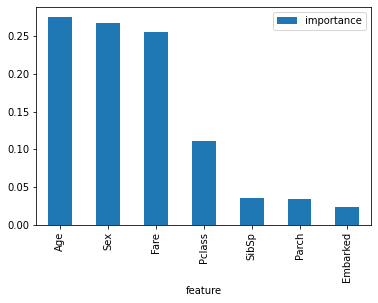

In [ ]:
importances.plot.bar()

In [ ]:
# Get the Predictions
predictions = model[2].predict(X_test)
print(predictions,end='\n''\n')
print(Y_test)

[1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1]

[0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1]


In [ ]:
pre = model[2].predict(X)
print(predictions)
print()
print(Y)

[1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1]

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 

In [ ]:
# Training with full data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test = test.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

# Encoding Sex Column
test.iloc[:, 1] = encode.fit_transform(test.iloc[:, 1].values)          #Here 5 is the index of the Sex Variable/Column  iloc is used for index of row and column

# Encoding Embarked column
test.iloc[:, -1] = encode.fit_transform(test.iloc[:, -1].values)


In [ ]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1 )

In [ ]:
test['Fare'] = test

In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,3.0,1
1,3,0,47.0,1,0,3.0,2
2,2,1,62.0,0,0,2.0,1
3,3,1,27.0,0,0,3.0,2
4,3,0,22.0,1,1,3.0,2


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [ ]:
predictions = model.predict(test)
predictions

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

**Submission**

In [ ]:
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
submission['Survived'] = predictions

In [ ]:
submission.to_csv('Submission.csv' , index = False)

In [ ]:
! kaggle competitions submit -c titanic -f /content/Submission.csv -m test_submission

100% 2.77k/2.77k [00:01<00:00, 1.75kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster